In [1]:
using CSV
using DataFrames
using Statistics

using Plots
using Plots.PlotMeasures

using NCBITaxonomy

┌ Warning: Your local taxonomy version is over 30 days old, we recommend using `] build NCBITaxonomy` to get the most recent version.
└ @ NCBITaxonomy /home/saakyanh2/.julia/packages/NCBITaxonomy/obnXA/src/NCBITaxonomy.jl:22


In [20]:
include("src/entropy.jl")

In [24]:
for file in readdir("data")
    if endswith(file, ".tsv")

        df = CSV.read("data/$file", DataFrame, delim="\t", header=1)
        df[!, [:fxity, :aver_rmsd]] = round.(df[:,[:fxity, :aver_rmsd]], digits = 2)
        df = dropmissing(df)


        println("fxity vs nclusts: ", round(cor(df.fxity, df.nclusts), digits = 2),
        ";      fxity vs aver_rmsd: ", round(cor(df.fxity, df.aver_rmsd), digits = 2),
        ";      nclusts vs nfrags: ", round(cor(df.nclusts, df.nfrags), digits = 2),
        ";      nclusts vs aver_rmsd: ", round(cor(df.nclusts, df.aver_rmsd), digits = 2 )
        )


        p1 = histogram(df.fxity, bins=25,    xlabel="fxity", ylabel="Frequency", labels="")
        p2 = histogram(df.nclusts, bins=25,    xlabel="nclusts", ylabel="Frequency", labels="")
        p3 = histogram(df.aver_rmsd, bins=25,   xlabel="aver_rmsd", ylabel="Frequency", labels="")
        p4 = histogram(df.nfrags, bins=25,    xlabel="nfrags", ylabel="Frequency", labels="")

        p5 = scatter(df.fxity, df.nclusts,  xlabel="fxity", ylabel="nclusts", markershape=:circle, markersize = 3, labels="")
        p6 = scatter(df.fxity, df.aver_rmsd,  xlabel="fxity", ylabel="aver_rmsd", markershape=:circle, markersize = 3,labels="")
        p7 = scatter(df.nclusts, df.nfrags,  xlabel="nclusts", ylabel="nfrags", markershape=:circle, markersize = 3, labels="")
        p8 = scatter(df.nclusts, df.aver_rmsd,  xlabel="nclusts", ylabel="aver_rmsd", markershape=:circle, markersize = 3, labels="")



        plot(p1, p2, p3, p4, p5, p6, p7, p8, layout=(2, 4), margins = 5mm, dpi=300, xtickfontsize=6, ytickfontsize=6)
        plot!(size=(900,600))
        savefig("data/$(split(file,".")[1]).png")
    end
end



fxity vs nclusts: -0.1;      fxity vs aver_rmsd: 0.55;      nclusts vs nfrags: 0.91;      nclusts vs aver_rmsd: 0.37
fxity vs nclusts: -0.13;      fxity vs aver_rmsd: 0.51;      nclusts vs nfrags: 0.87;      nclusts vs aver_rmsd: 0.43
fxity vs nclusts: -0.08;      fxity vs aver_rmsd: 0.49;      nclusts vs nfrags: 0.87;      nclusts vs aver_rmsd: 0.38
fxity vs nclusts: -0.03;      fxity vs aver_rmsd: 0.55;      nclusts vs nfrags: 0.9;      nclusts vs aver_rmsd: 0.31
fxity vs nclusts: NaN;      fxity vs aver_rmsd: NaN;      nclusts vs nfrags: 1.0;      nclusts vs aver_rmsd: NaN


In [3]:
taxondata = CSV.read("data/astral.id", DataFrame, header=1)

ids = []
lineages = []

for (id, taxid) in zip(taxondata.id, taxondata.taxid)
    try
        push!(lineages, lineage(taxon(taxid)))
        push!(ids, id) 
    catch
        println(id)
    end
end


d3g46a_
d1cg5a_
d1cg5b_
d1fafa_
d1gh6a1
d4pkla1
d2kq5a_
d2jpca_
d4zbda2
d2gsqa1
d2dpya3
d1r4ga_
d2ahma1
d2ofka_
d1vzia1
d4qi3a1
d1pl3a_
d1gmua1
d1zrua2
d1wkta_
d1sska1
d3glaa_
d1zrua1
d3wg3a1
d1ojja_
d1olra_
d1h8la1
d2b1xa1
d6ly5e_
d1g3pa2
d6lwta1
d5xgta_
d1gvpa_
d2z48a2
d2z48a1
d3h7oa_
d3h7ta_
d3su6a1
d2dpya1
d5xbxa1
d3cvba_
d2n93a_
d7bwua_
d6jjma1
d2jexa_
d3boea_
d4cjxa2
d3cz5a_
d2dpya2
d1svma_
d4zbda1
d4f0ba1
d2kp2a1
d2gsqa2
d1h8la2
d4cjxa1
d1oc7a_
d1dysa_
d4ymha_
d3stya_
d3fcya_
d1g66a_
d4n08a_
d1q3qa2
d1al3a_
d2veza_
d2b1xa2
d4m0wa1
d2gria1
d1kdga2
d3alua_
d1wmya_
d2ziba1
d2oqea3
d2oqea2
d2b1xb1
d6ly5d_
d6sj5a_
d3fhua_
d1w9pa2
d2z48a3
d4m0wa2
d5axwa3
d5axwa2
d6ly5c_
d1gmua2
d2bopa_
d5axwa4
d6ly5f1
d6ly5j_
d6ly5a_
d1slqa_
d2w9ua_
d2i61a_
d1jlza_
d1cmra_
d1vzia2
d2pkgc1


In [4]:
domains = [taxid[3].name for taxid=lineages]
domaindata = DataFrame(id=ids, domain=domains)
df = dropmissing(domaindata)
e = "Eukaryota"
b = "Bacteria" 
a = "Archaea" 



"Archaea"

In [8]:
entropies = CSV.read("data/3di.dat", DataFrame, delim="\t", header=["id","seqaa", "seq3di", "coords"])
select!(entropies, Not([:coords]));

print()


In [28]:
entropies[!, :aaentropy] = shannon.(entropies.seqaa)
entropies[!, :seq3dientropy] = shannon.(entropies.seq3di)

3287-element Vector{Float64}:
 3.9545144907778162
 3.012352408750405
 2.7415147048605495
 2.455576981704117
 4.0346763729075095
 2.454352296527107
 3.459009228582161
 2.119637153360411
 3.192307715780178
 3.458635496593911
 ⋮
 3.0700296292811906
 3.177913250593563
 3.63187412158608
 3.4734712105682375
 3.6813268255201077
 3.5544394591198323
 3.7643814255936436
 3.173132556371825
 3.6150282400090585

In [30]:
fxdata = CSV.read("data/scop40_fs6_rmsd30.tsv", DataFrame, delim="\t", header=1)
df = innerjoin(fxdata, taxondata, domaindata, entropies, on=:id)
df = dropmissing(df)
first(df, 10)

Row,ndx,id,fxity,nclusts,aver_rmsd,nfrags,scop,taxid,domain,seqaa,seq3di,aaentropy,seq3dientropy
,Int64,String7,Float64,Int64,Float64,Int64,String15,Int64,String,String,String,Float64,Float64
1,8,d12asa_,0.521739,168,9.90613,322,d.104.1.1,562,Bacteria,AYIAKQRQISFVKSHFSRQLEERLGLIEVQAPILSRVGDGTQDNLSGAEKAVQVKVKALPDAQFEVVHSLAKWKRQTLGQHDFSAGEGLYTHMKALRPDEDRLSPLHSVYVDQWDWERVMGDGERQFSTLKSTVEAIWAGIKATEAAVSEEFGLAPFLPDQIHFVHSQELLSRYPDLDAKGRERAIAKDLGAVFLVGIGGKLSDGHRHDVRAPDYDDWSTPSELGHAGLNGDILVWNPVLEDAFELSSMGIRVDADTLKHQLALTGDEDRLELEWHQALLRGEMPQTIGGGIGQSRLTMLLLQLPHIGQVQAGVWPAAVRESVPSLL,DVVVLLVLLVLLLVLLVVLCCVLQVAEEDDDDQKDWPFFLQADCWLVPFDFAWDQDPVCRPTTMGTGPWRLLVQQLVCLVVVPDASHKYWYFDWGAGVPDPDAFLADFSIFTWRWMKGFHDPPCPAQVVVVVVVFSSVVSLVVSLVVCCPVVVDDHDADPGAEEDEPQVLCVVCVPDALQVSLQVCQVVTFKYWYFQADDQYPPGDGSHHGDLFWFFNACDHVNGGGGFWTWIWGQQPLQNGIATFKIWGWTDALVSSVVRCVVSVNPVSCPHNSNVCRNVPSGGGMIIIIGTSLSSSCRSVVHRHSQQSDPGDDDVVCVVVDPNGD,4.02508,3.95451
2,10,d1914a1,0.493151,36,9.37426,73,d.49.1.1,10090,Eukaryota,FQTWEEFSRAAEKLYLADPMKVRVVLKYRHVDGNLCIKVTDDLVCLVYRTDQAQDVKKIEKFHSQLMRLMVAKESRNV,DPDPVVLLVVLVCQCVVDVVQKDWDWDDDVVVQKIKIWIDSVPDIGMDIDNDPVCPVVSVVSSVVSVVVSPDDDPDDD,4.03883,3.01235
3,11,d1a04a1,0.33871,21,6.90323,62,a.4.6.2,562,Bacteria,ERDVNQLTPRERDILKLIAQGLPNKMIARRLDITESTVKVHVKHMLKKMKLKSRVEAAVWVHQERIF,DFDQVPDDPLLVLLLVVLLVVDDLVVSCVVVVHHSVVSVVSVVVSCVRRVQPDSPSSNVVCVVVVPD,3.91761,2.74151
4,12,d1a0aa_,0.551724,32,6.31204,58,a.38.1.1,4932,Eukaryota,MKRESHKHAEQARRNRLAVALHELASLIPAEWKQQNVSAAPSKATTVEAACRYIRHLQQNGST,DCPPVCVCVCCVVCVCLQCVLVVLVVPADPVVCVVDDDPDPDSVVCVVVSCVRVVPVPPPPPD,3.84606,2.45558
5,21,d1a12a_,0.424242,168,9.34041,396,b.69.5.1,9606,Eukaryota,KKVKVSHRSHSTEPGLVLTLGQGDVGQLGLGENVMERKKPALVSIPEDVVQAEAGGMHTVCLSKSGQVYSFGCNDEGALGRDTSVEGSEMVPGKVELQEKVVQVSAGDSHTAALTDDGRVFLWGSFRDNNGVIGLLEPMKKSMVPVQVQLDVPVVKVASGNDHLVMLTADGDLYTLGCGEQGQLGRVPELFANRGGRQGLERLLVPKCVMLKSRGSRGHVRFQDAFCGAYFTFAISHEGHVYGFGLSNYHQLGTPGTESCFIPQNLTSFKNSTKSWVGFSGGQHHTVCMDSEGKAYSLGRAEYGRLGLGEGAEEKSIPTLISRLPAVSSVACGASVGYAVTKDGRVFAWGMGTNYQLGTGQDEDAWSPVEMMGKQLENRVVLSVSSGGQHTVLLVKDKEQS,DLDFDAAPPFFQDWFWKWKFFAQCFQARQPWDPDGGHLFTDTADDPATFRDWADAFFKIWTAHNQQWIWIAGDCPQQARQDDPPDPTPRNHIDTHDDPFRWGDKEHAQFKIWTAGRSQKIWMFGFAADPVGTQDALDGPHGHNHTDIADDPAGFHDWYDANFKIWTQGPVQWIWIAGDCQLLARQPPVVCNPVHDCSVVRNVRNRTDTQFAADVVGDGGWGFDDKYDENFKIWTATPVQFIWIFGACLFLQRLDPDGGGGNHIHRRCLPDDPVFRWDAWYYADFKIWTDTPFQWIWMAGQCPLQARQQDPPDGGGNHTHTQPPDARFDYKYDENFKIWTFHPQQWIWIFGQQQRSARQPSDRHGHNHIDTHDDDVPVQKGWPDKYYYNTMIMTTIHHNPDD,4.04602,4.03468
6,22,d1a1ia1,0.791667,19,8.77405,24,g.37.1.1,10090,Eukaryota,RPYACPVESCDRRFSRSADLTRHIRIHTG,DPAAQPDPVDGDGDPDVVVSVVVCVVVVD,3.67644,2.45435
7,23,d1a1yi_,0.775862,45,9.07571,58,d.40.1.1,112509,Eukaryota,KTEWPELVGKSVEEAKKVILQDKPEAQIIVLPVGTIVTMEYRIDRVRLFVDKLDNIAEVPRVG,DFWDPVQFFPAPVVVVVVVCVVQVQADEDEDEPPDDDDPDFDQRYKYFYAYPVRGGHDIIGHD,3.82229,3.45901
8,24,d1a32a_,0.35,28,5.41691,80,a.16.1.2,1422,Bacteria,LTQERKREIIEQFKVHENDTGSPEVQIAILTEQINNLNEHLRVHKKDHHSRRGLLKMVGKRRRLLAYLRNKDVARYREIVEKLGL,DDPVVVVVVVVVPDDDDPDPPDLLSLLVVLLVVLVVLVVVCVVVVVDDVCPVVSVVSVVVNVVSLVVCCVVPVVVSVVSCVVSVD,3.8548,2.11964
9,25,d1a4ia2,0.516667,62,8.78721,120,c.58.1.2,9606,Eukaryota,APAEILNGKEISAQIRARLKNQVTQLKEQVPGFTPRLAILQVGNRDDSNLYINVKLKAAEEIGIKATHIKLPRTTTESEVMKYITSLNEDSTVHGFLVQLPLDSENSINTEEVINAIAPEKDVDG,DDDDDPDPVVVVVVVLVVLLVVQVVVCVVPPPQAAEEEEEAAADDVVLVVVVVVVCVSCVSSRHHYHYHYHHQQDDQVVLLVVQVVLQPPPSHQAYDYGPDHRHPDDHDVVVSLVSHDPRRHVVD,3.96022,3.19231


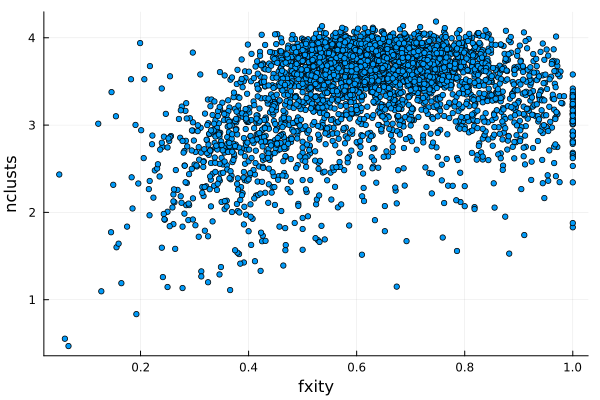

In [36]:
scatter(df.fxity , df.seq3dientropy,  xlabel="fxity", ylabel="nclusts", markershape=:circle, markersize = 3, labels="")

In [16]:
println("foldexity ", mean(df[df.domain .== e,:].fxity))
println("foldexity ", mean(df[df.domain .== b,:].fxity))
println("foldexity ", mean(df[df.domain .== a,:].fxity))
println("foldexity ", median(df[df.domain .== e,:].fxity))
println("foldexity ", median(df[df.domain .== b,:].fxity))
println("foldexity ", median(df[df.domain .== a,:].fxity))
println()
println("average RMSD: ",mean(df[df.domain .== e,:].aver_rmsd))
println("average RMSD: ",mean(df[df.domain .== b,:].aver_rmsd))
println("average RMSD: ",mean(df[df.domain .== a,:].aver_rmsd))
println("average RMSD: ",median(df[df.domain .== e,:].aver_rmsd))
println("average RMSD: ",median(df[df.domain .== b,:].aver_rmsd))
println("average RMSD: ",median(df[df.domain .== a,:].aver_rmsd))

foldexity 0.6492458777527366
foldexity 0.6002231678066319
foldexity 0.5919332300300302
foldexity 0.6530012004801921
foldexity 0.6054421768707483
foldexity 0.5970149253731343

average RMSD: 8.566592655343122
average RMSD: 8.743778753900981
average RMSD: 8.750943928383128
average RMSD: 8.97375285010431
average RMSD: 9.142487587883455
average RMSD: 9.13885365501808


In [ ]:
p11 = histogram(df[df.domain .== e,:].fxity, xlimits=(0,1))
p21 = histogram(df[df.domain .== b,:].fxity, xlimits=(0,1))
p31 = histogram(df[df.domain .== a,:].fxity, xlimits=(0,1))
vline!(p11, [mean(df[df.domain .== e,:].fxity)], lw=2, color="red", label="Mean")
vline!(p21, [mean(df[df.domain .== b,:].fxity)], lw=2, color="red", label="Mean")
vline!(p31, [mean(df[df.domain .== a,:].fxity)], lw=2, color="red", label="Mean")
vline!(p11, [median(df[df.domain .== e,:].fxity)], lw=2, color="dark violet", label="Median")
vline!(p21, [median(df[df.domain .== b,:].fxity)], lw=2, color="dark violet", label="Median")
vline!(p31, [median(df[df.domain .== a,:].fxity)], lw=2, color="dark violet", label="Median")

p12 = histogram(df[df.domain .== e,:].aver_rmsd, xlimits = (0,8))
p22 = histogram(df[df.domain .== b,:].aver_rmsd)
p32 = histogram(df[df.domain .== a,:].aver_rmsd)
vline!(p12, [mean(df[df.domain .== e,:].aver_rmsd)], lw=2, color="red", label="Mean")
vline!(p22, [mean(df[df.domain .== b,:].aver_rmsd)], lw=2, color="red", label="Mean")
vline!(p32, [mean(df[df.domain .== a,:].aver_rmsd)], lw=2, color="red", label="Mean")
vline!(p12, [median(df[df.domain .== e,:].aver_rmsd)], lw=2, color="dark violet", label="Median")
vline!(p22, [median(df[df.domain .== b,:].aver_rmsd)], lw=2, color="dark violet", label="Median")
vline!(p32, [median(df[df.domain .== a,:].aver_rmsd)], lw=2, color="dark violet", label="Median")

p13 = histogram(df[df.domain .== e,:].nfrags)
p23 = histogram(df[df.domain .== b,:].nfrags)
p33 = histogram(df[df.domain .== a,:].nfrags)
vline!(p13, [mean(df[df.domain .== e,:].nfrags)], lw=2, color="red", label="Mean")
vline!(p23, [mean(df[df.domain .== b,:].nfrags)], lw=2, color="red", label="Mean")
vline!(p33, [mean(df[df.domain .== a,:].nfrags)], lw=2, color="red", label="Mean")
vline!(p13, [median(df[df.domain .== e,:].nfrags)], lw=2, color="dark violet", label="Median")
vline!(p23, [median(df[df.domain .== b,:].nfrags)], lw=2, color="dark violet", label="Median")
vline!(p33, [median(df[df.domain .== a,:].nfrags)], lw=2, color="dark violet", label="Median")

p14 = histogram(df[df.domain .== e,:].nfrags)
p24 = histogram(df[df.domain .== b,:].nfrags)
p34 = histogram(df[df.domain .== a,:].nfrags)
vline!(p14, [mean(df[df.domain .== e,:].nfrags)], lw=2, color="red", label="Mean")
vline!(p24, [mean(df[df.domain .== b,:].nfrags)], lw=2, color="red", label="Mean")
vline!(p34, [mean(df[df.domain .== a,:].nfrags)], lw=2, color="red", label="Mean")
vline!(p14, [median(df[df.domain .== e,:].nfrags)], lw=2, color="dark violet", label="Median")
vline!(p24, [median(df[df.domain .== b,:].nfrags)], lw=2, color="dark violet", label="Median")
vline!(p34, [median(df[df.domain .== a,:].nfrags)], lw=2, color="dark violet", label="Median")






plot(p11, p21, p31, p12, p22, p32, p13, p23, p33, p14, p24, p34, layout=(3, 4), margins = 5mm, dpi=500, xtickfontsize=6, ytickfontsize=6)
plot!(size=(1000,1000))

In [ ]:
df2 = df[(df.nfrags .> 100) .& (df.nfrags .< 1000),:]
sort!(df2,:aver_rmsd)
df2[end-10:end,:]